In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import rc
import matplotlib.pyplot as plt

In [2]:
#한글 깨짐 방지
from matplotlib import rc, font_manager
font_path='data/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
#마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

In [3]:
# 데이터 불러오기
data = pd.read_csv('./data/merge/207_mackerel_product.csv',encoding='cp949')
# 전처리
data = data[['date','수온','염분','용존산소','생산량']]
# '%Y-%m' 형식으로 변환
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data.set_index('date',inplace=True)
data

,수온,염분,용존산소,생산량
date,,,,
2008-01-01,15.75,33.650,5.52,7994
2008-02-01,14.80,34.010,5.82,1430
2008-03-01,14.30,33.985,5.74,3001
2008-04-01,13.80,33.960,5.65,1385
2008-05-01,14.35,34.070,5.24,582
...,...,...,...,...
2022-08-01,20.00,32.820,3.97,3900
2022-09-01,21.35,33.800,4.12,5494
2022-10-01,22.70,34.030,4.86,5339


In [8]:
# 시계열 데이터 선택
ts_data = data['용존산소']

# ARIMA 모델 학습
model = sm.tsa.ARIMA(ts_data, order=(50, 1, 0))  # ARIMA(p, d, q)의 각 매개변수 설정
results = model.fit()

c:\Users\leejaehyeon\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\leejaehyeon\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\leejaehyeon\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\leejaehyeon\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leejaehyeon\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum

In [9]:
# 미래 값 예측
forecast_steps = 24  # 2024년 1월부터 12월까지의 예측
forecast = results.forecast(steps=forecast_steps)

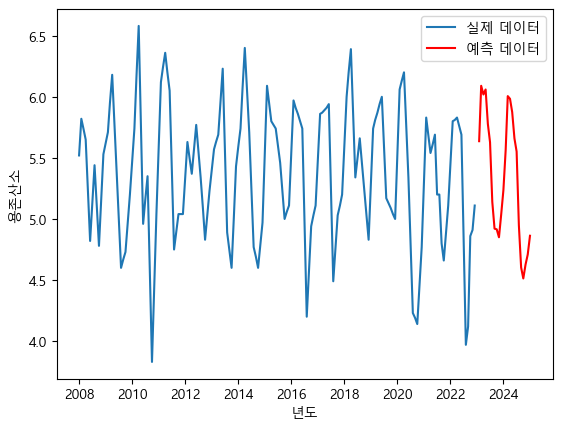

In [13]:
# 예측 결과 시각화
plt.plot(ts_data.index, ts_data, label='실제 데이터')
forecast_index = pd.date_range(start='2023-01-01', periods=forecast_steps, freq='M')
plt.plot(forecast_index, forecast, label='예측 데이터', color='red')
plt.legend()
plt.xlabel('년도')
plt.ylabel('용존산소')
plt.show()

In [12]:
# 2024년 예측값 출력
print("2024년 예상 가격:", forecast)
# plt.savefig("c:2023_2024_수온예측.png")

2024년 예상 가격: 2023-01-01    5.636581
2023-02-01    6.089872
2023-03-01    6.018726
2023-04-01    6.059891
2023-05-01    5.777828
2023-06-01    5.627828
2023-07-01    5.139637
2023-08-01    4.920770
2023-09-01    4.915234
2023-10-01    4.850128
2023-11-01    5.033367
2023-12-01    5.235884
2024-01-01    5.562010
2024-02-01    6.005521
2024-03-01    5.983469
2024-04-01    5.874672
2024-05-01    5.659790
2024-06-01    5.551597
2024-07-01    4.948155
2024-08-01    4.603141
2024-09-01    4.512840
2024-10-01    4.627498
2024-11-01    4.708793
2024-12-01    4.862626
Freq: MS, Name: predicted_mean, dtype: float64
